# NOTEBOOK TEAM CHALLENGE: TOOLBOX (I)

## 0. Importamos librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

## 1. Función: describe_df

In [2]:
from toolbox_ML import describe_df  # Importar la función desde el módulo toolbox_ML

titanic_df = pd.read_csv("./data/titanic.csv")

# Crear una copia del DataFrame
titanic_copy = titanic_df.copy()

titanic_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [3]:
# Usar la función describe_df
description = describe_df(titanic_copy)

# Mostrar los resultados
description

,Column Name,Data Type,Null Percentage (%),Unique Values,Cardinality (%)
0,survived,int64,0.000000,2,0.224467
1,pclass,int64,0.000000,3,0.336700
2,sex,object,0.000000,2,0.224467
3,age,float64,19.865320,88,9.876543
4,sibsp,int64,0.000000,7,0.785634
5,parch,int64,0.000000,7,0.785634
6,fare,float64,0.000000,248,27.833895
7,embarked,object,0.224467,3,0.336700
8,class,object,0.000000,3,0.336700
9,who,object,0.000000,3,0.336700


## 2. Función: tipifica_variables

In [4]:
from toolbox_ML import tipifica_variables

# Definir los umbrales
umbral_categoria = 10
umbral_continua = 0.1

# Probar la función
tipo_variables = tipifica_variables(titanic_copy, umbral_categoria, umbral_continua)
tipo_variables


,nombre_variable,tipo_sugerido
0,survived,Binaria
1,pclass,Categórica
2,sex,Binaria
3,age,Numérica Discreta
4,sibsp,Categórica
5,parch,Categórica
6,fare,Numérica Continua
7,embarked,Categórica
8,class,Categórica
9,who,Categórica


## 3. Función: get_features_num_regression

In [5]:
df_USA_Housing = pd.read_csv("./data/USA_Housing.csv")
df_USA_Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


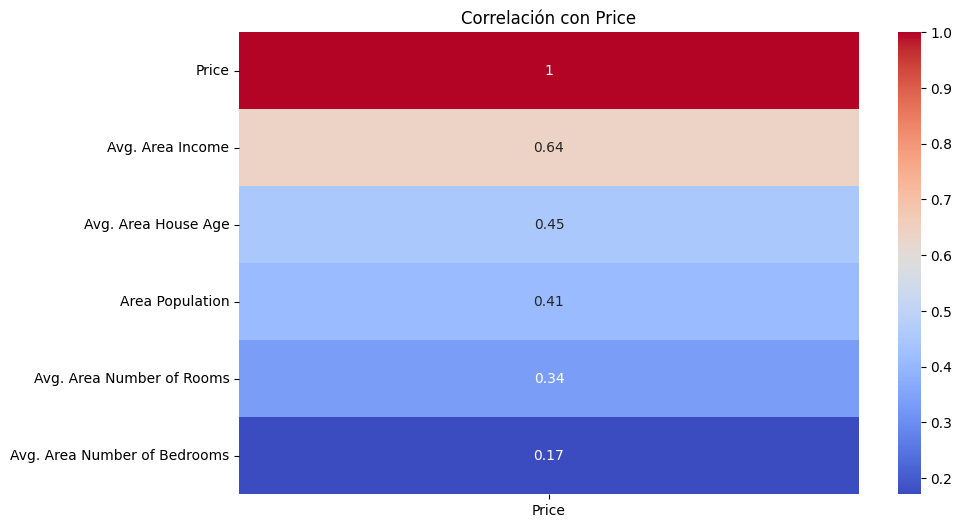

In [6]:
df_USA = df_USA_Housing.drop(columns=["Address"]) # Elimino la columna categórica

# Cálculo de la correlación
corr_matrix = df_USA.corr()

# Visualizar correlación de las características con la variable objetivo "Price"
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix[['Price']].sort_values(by='Price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlación con Price')
plt.show()

In [7]:
from toolbox_ML import get_features_num_regression

get_features_num_regression(df_USA_Housing, "Price", 0.4)

['Avg. Area Income', 'Avg. Area House Age', 'Area Population']

## 4. Función: plot_features_num_regression

In [8]:
columnas = df_USA_Housing.columns.to_list()
columnas

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price',
 'Address']

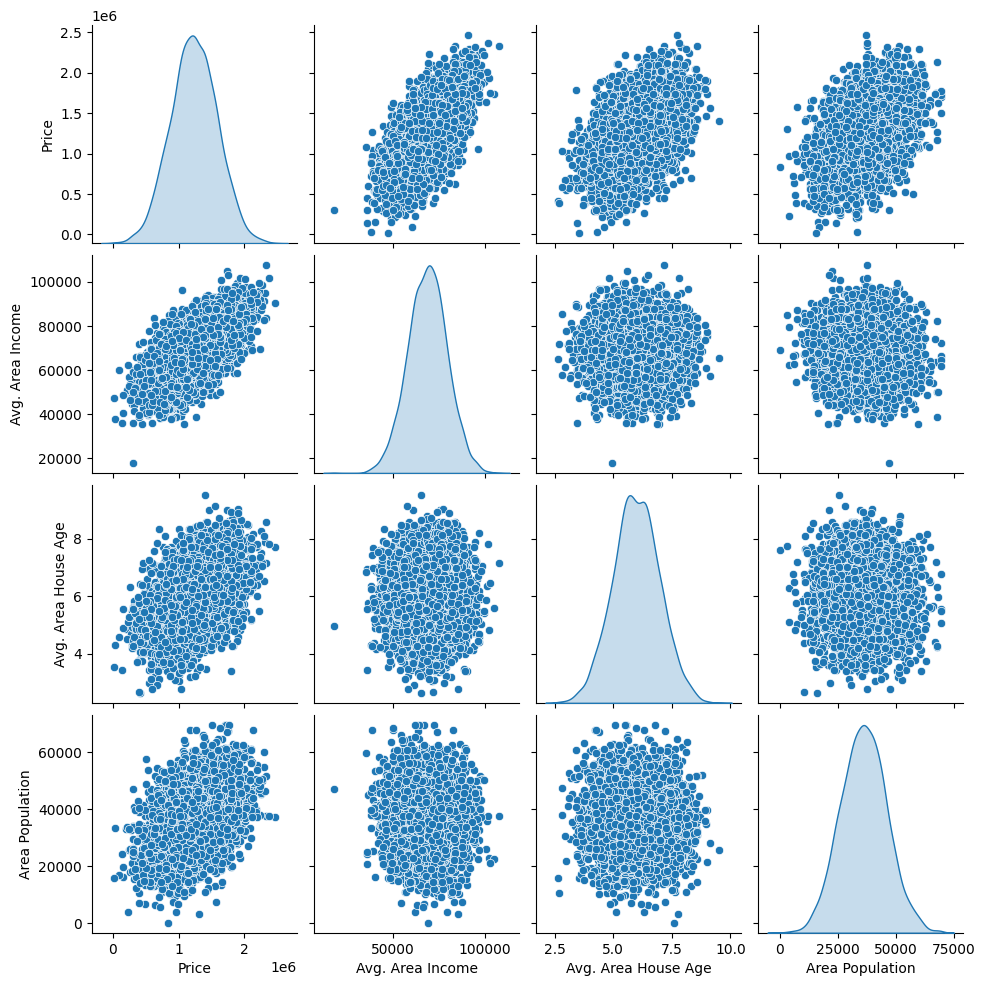

['Avg. Area Income', 'Avg. Area House Age', 'Area Population']

In [9]:
from toolbox_ML import plot_features_num_regression

plot_features_num_regression(df_USA_Housing, "Price",["Avg. Area Income",
 "Avg. Area House Age",
 "Area Population",
 "Price"], 0.4, 0.05)

In [11]:
# Error columna tipo "object"

plot_features_num_regression(df_USA_Housing, "Price", ["Address"], 0.4, 0.05)

ValueError: data type <class 'numpy.object_'> not inexact

## 5. Función: get_features_cat_regression

In [12]:
from toolbox_ML import get_features_cat_regression

df_titanic = pd.read_csv("./data/titanic_modified.csv")

In [13]:
get_features_cat_regression(df_titanic, target_col="Survived")

['Pclass', 'Sex', 'SibSp', 'Parch', 'MissingAge', 'Spouse']

## 6. Función: plot_features_cat_regression

In [14]:
columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'MissingAge', 'Spouse']

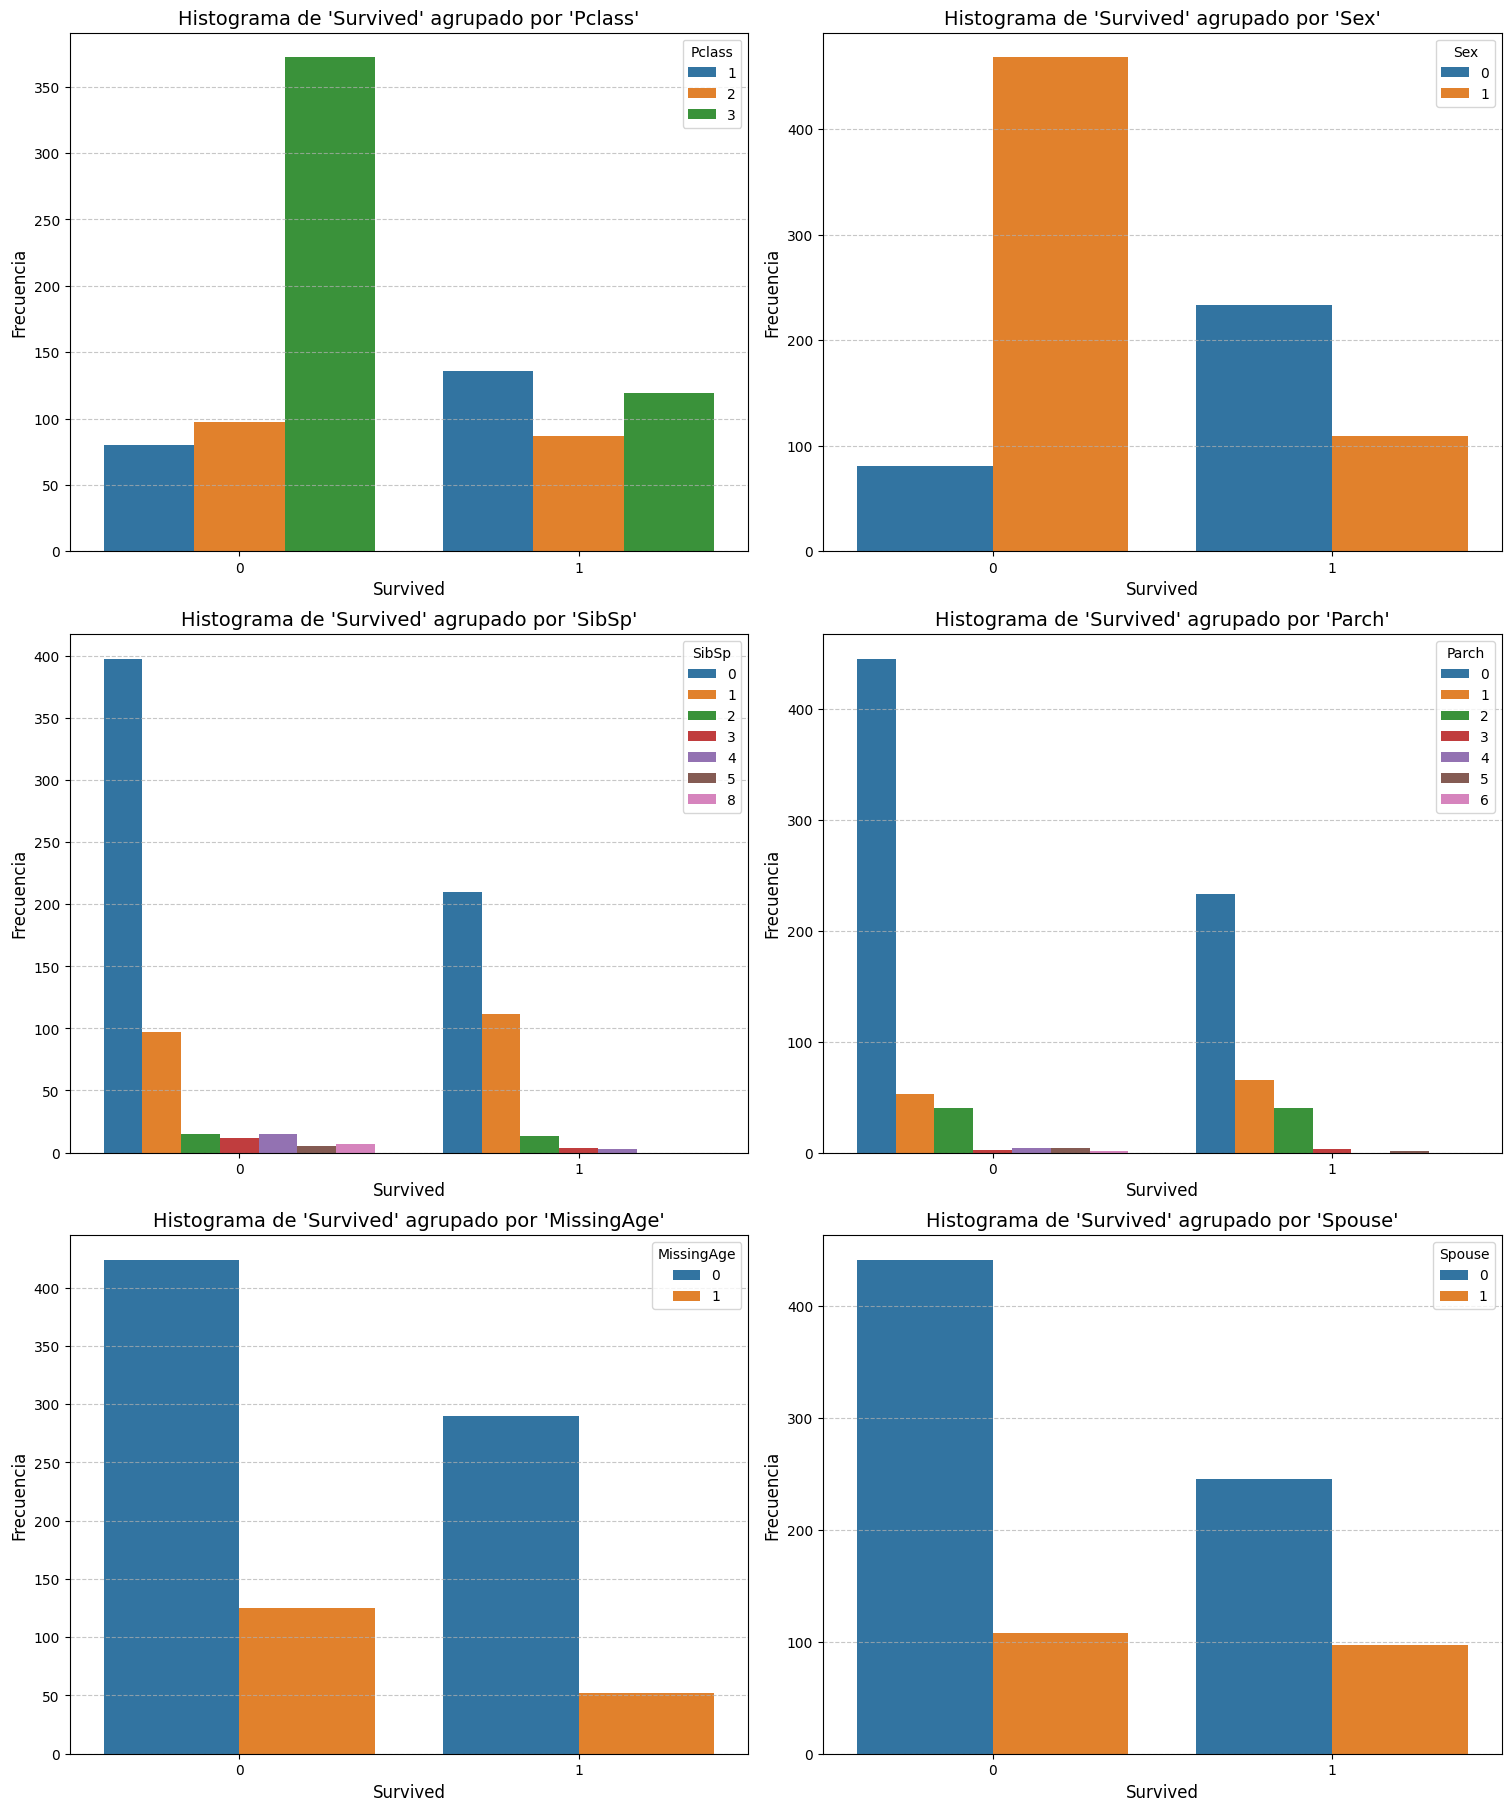

In [15]:
from toolbox_ML import plot_features_cat_regression 

plot_features_cat_regression(df_titanic,target_col="Survived",categorical_columns= columns)

***

***

## Funcion que hace los dos pasos juntos 

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

def filter_and_plot_features_cat_reg(dataframe, target_col="", columns=None, pvalue=0.05, with_individual_plot=False):
    """
    Filtra y grafica columnas categóricas que tienen una relación significativa con una columna objetivo.

    Parámetros:
    - dataframe: pd.DataFrame. El DataFrame de entrada.
    - target_col: str. Nombre de la columna objetivo.
    - columns: list. Lista de columnas categóricas a evaluar. Si está vacía, se seleccionan automáticamente.
    - pvalue: float. Nivel de significancia para la prueba Chi-cuadrado.
    - with_individual_plot: bool. Si True, genera gráficos individuales para cada columna significativa.

    Retorna:
    - Una lista de columnas que cumplen con las condiciones de significancia.
    """
    if not isinstance(dataframe, pd.DataFrame):
        print("Error: El argumento 'dataframe' debe ser un DataFrame de pandas.")
        return None

    if not target_col or target_col not in dataframe.columns:
        print("Error: La columna objetivo no existe o no se especificó correctamente.")
        return None

    if not np.issubdtype(dataframe[target_col].dtype, np.number):
        print("Error: La columna objetivo debe ser numérica.")
        return None

    if columns is None:
        columns = []

    if not columns:
        # Seleccionar columnas numéricas con baja cardinalidad
        columns = [col for col in dataframe.select_dtypes(include=[np.number]).columns 
                   if col != target_col and dataframe[col].nunique() <= 10]

    if not columns:
        print("No se encontraron columnas para evaluar.")
        return []

    significant_columns = []

    for col in columns:
        try:
            # Crear tabla de contingencia
            contingency_table = pd.crosstab(dataframe[col], pd.cut(dataframe[target_col], bins=5))

            # Realizar prueba de Chi-cuadrado
            chi2, p, dof, expected = chi2_contingency(contingency_table)

            # Evaluar significancia
            if p < pvalue:
                significant_columns.append(col)

                # Graficar si se solicita
                if with_individual_plot:
                    plt.figure(figsize=(10, 6))
                    sns.countplot(
                        data=dataframe,
                        x=target_col,
                        hue=col,
                        palette="tab10"
                    )
                    plt.title(f"Histograma de '{target_col}' agrupado por '{col}'", fontsize=14)
                    plt.xlabel(target_col, fontsize=12)
                    plt.ylabel("Frecuencia", fontsize=12)
                    plt.grid(axis='y', linestyle='--', alpha=0.7)
                    plt.legend(title=col, fontsize=10)
                    plt.tight_layout()
                    plt.show()

        except Exception as e:
            print(f"Error al procesar la columna '{col}': {e}")

    # Graficar todas las columnas significativas juntas
    if significant_columns:
        num_cols = len(significant_columns)
        cols_per_row = 2  # Número de columnas por fila
        rows = (num_cols + cols_per_row - 1) // cols_per_row

        fig, axes = plt.subplots(nrows=rows, ncols=cols_per_row, figsize=(15, 6 * rows), constrained_layout=True)
        axes = axes.flatten()

        for i, col in enumerate(significant_columns):
            sns.countplot(
                data=dataframe,
                x=target_col,
                hue=col,
                palette="tab10",
                ax=axes[i]
            )
            axes[i].set_title(f"Histograma de '{target_col}' agrupado por '{col}'", fontsize=14)
            axes[i].set_xlabel(target_col, fontsize=12)
            axes[i].set_ylabel("Frecuencia", fontsize=12)
            
            axes[i].grid(axis='y', linestyle='--', alpha=0.7)
            axes[i].legend(title=col, fontsize=10)

        # Eliminar subplots vacíos
        for j in range(len(significant_columns), len(axes)):
            fig.delaxes(axes[j])

        plt.show()

    return significant_columns


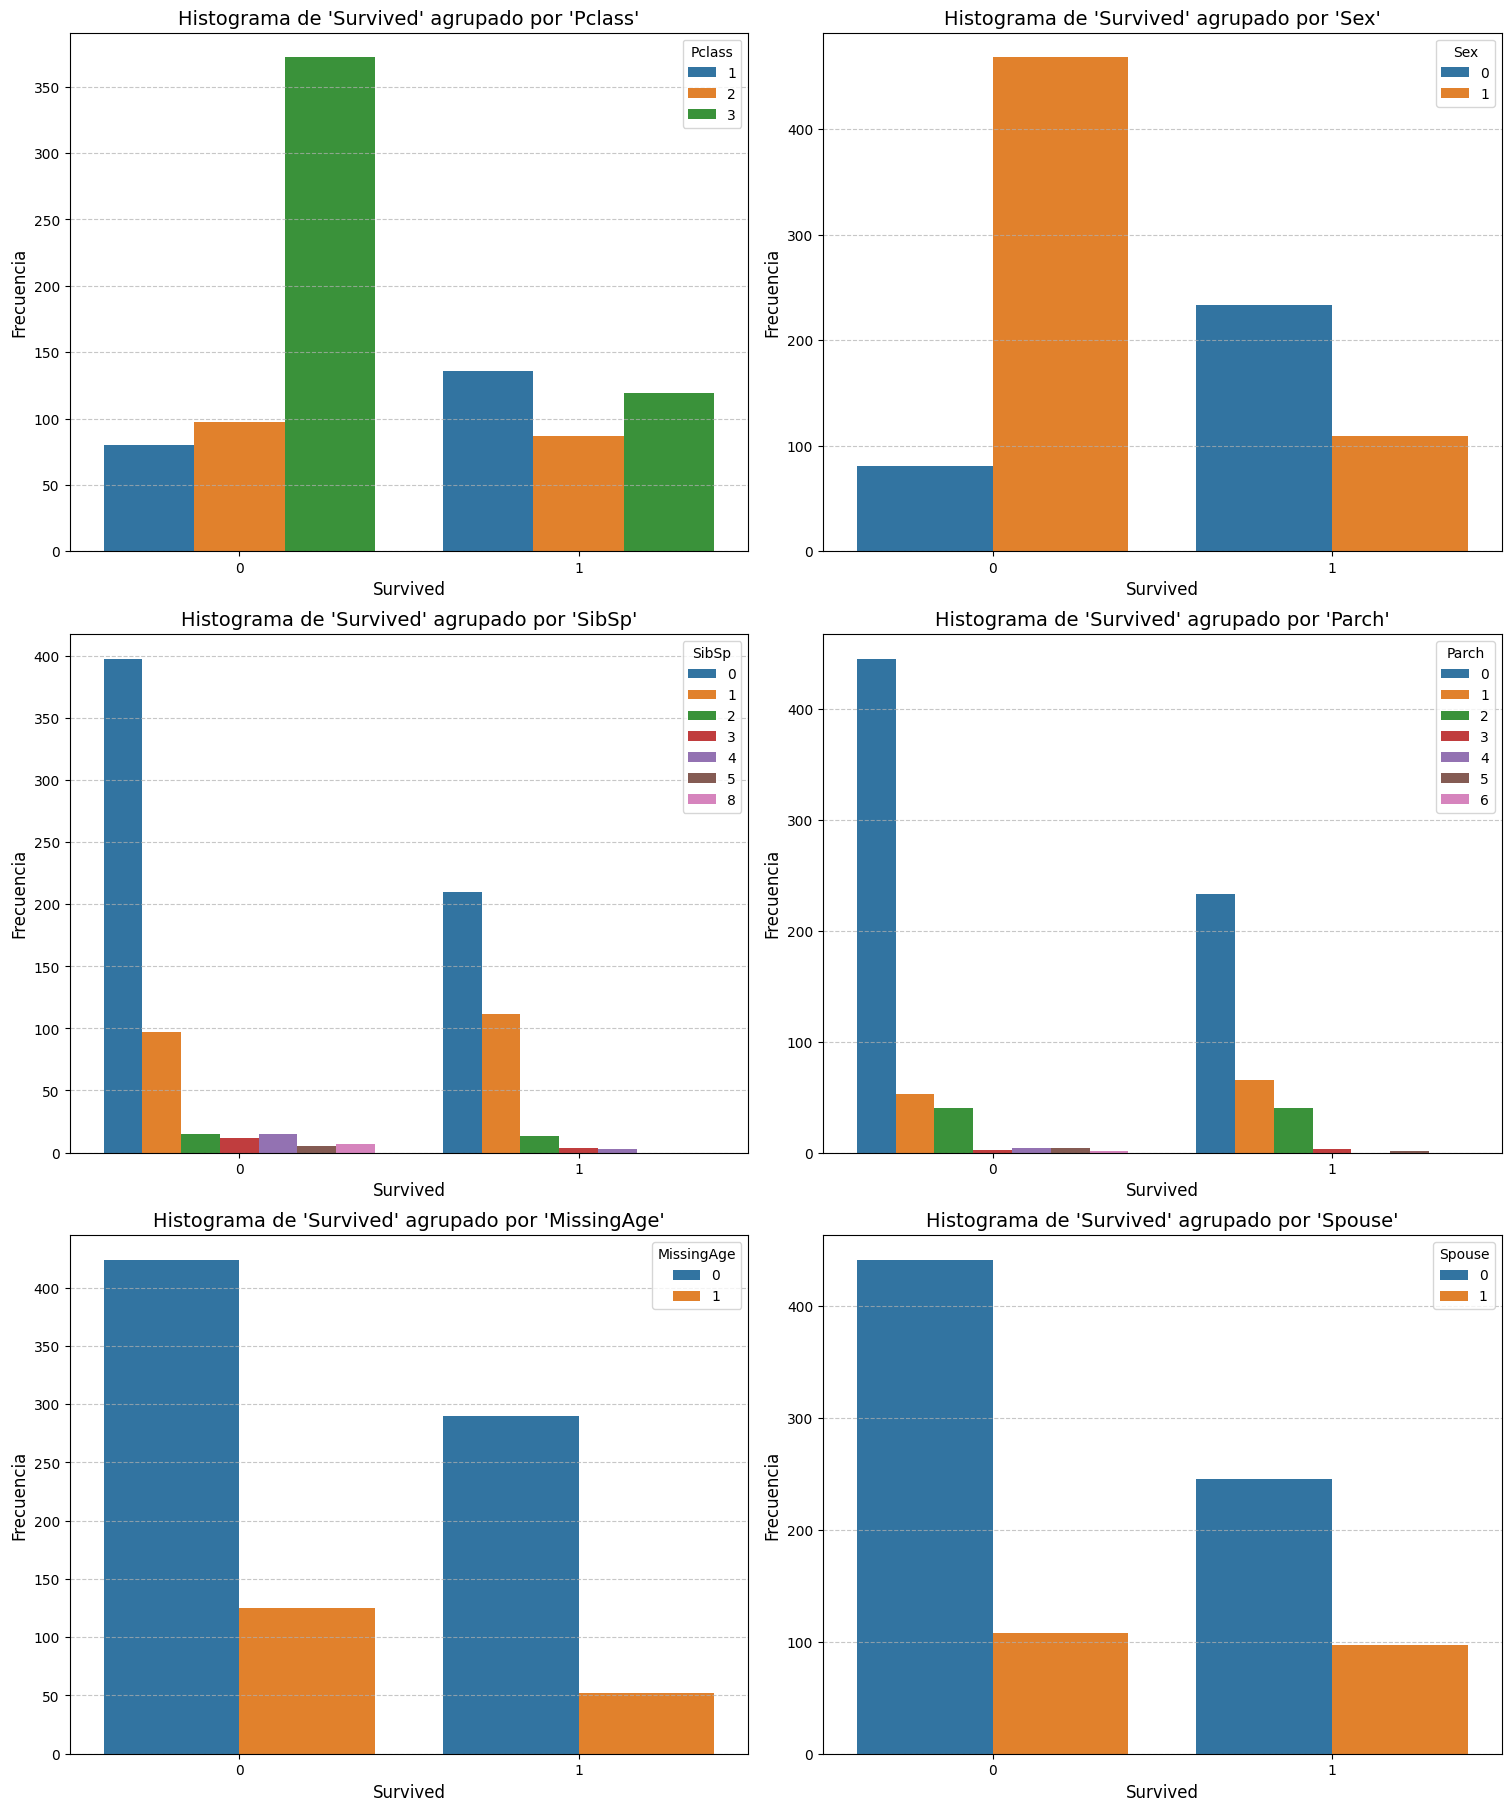

['Pclass', 'Sex', 'SibSp', 'Parch', 'MissingAge', 'Spouse']

In [17]:
filter_and_plot_features_cat_reg(df_titanic, target_col="Survived")